In [50]:
!pip install yellowbrick

  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
import scikitplot as skplt
#from yellowbrick.classifier.rocauc import roc_auc

In [52]:
data=pd.read_csv("abalone.txt")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [53]:
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [55]:
data.shape

(4177, 9)

In [56]:
# checking the column names

data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [57]:
# checking datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [58]:
#checking for null values

data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [59]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [60]:
data.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

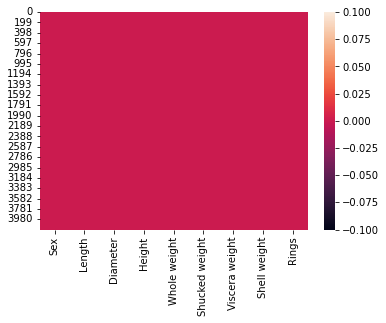

In [61]:
# UNIVARIATE ANALYSIS
# Visualizing null values with the help of heatmap

sns.heatmap(data.isnull())
plt.show()

Text(0.5, 1.0, 'Sex Count')

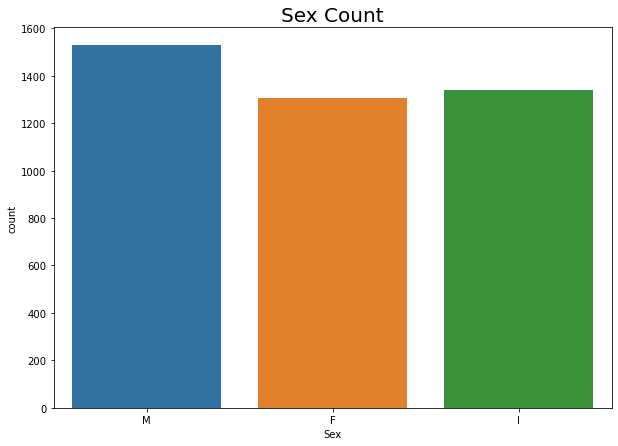

In [62]:
#UNIVARIATE ANALYSIS
# checking sex count with countplot

plt.figure(figsize=(10,7))
sns.countplot(x='Sex',data=data)
plt.title("Sex Count",fontsize=20)

<AxesSubplot:xlabel='Rings', ylabel='Density'>

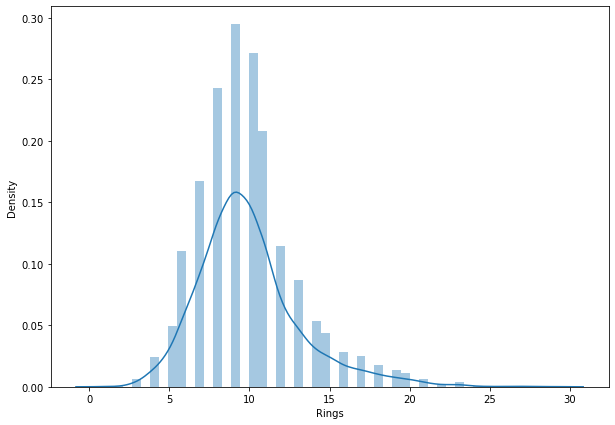

In [63]:
#Bivariate Analysis

plt.figure(figsize=(10,7))
sns.distplot(data.Rings)

<AxesSubplot:xlabel='Height'>

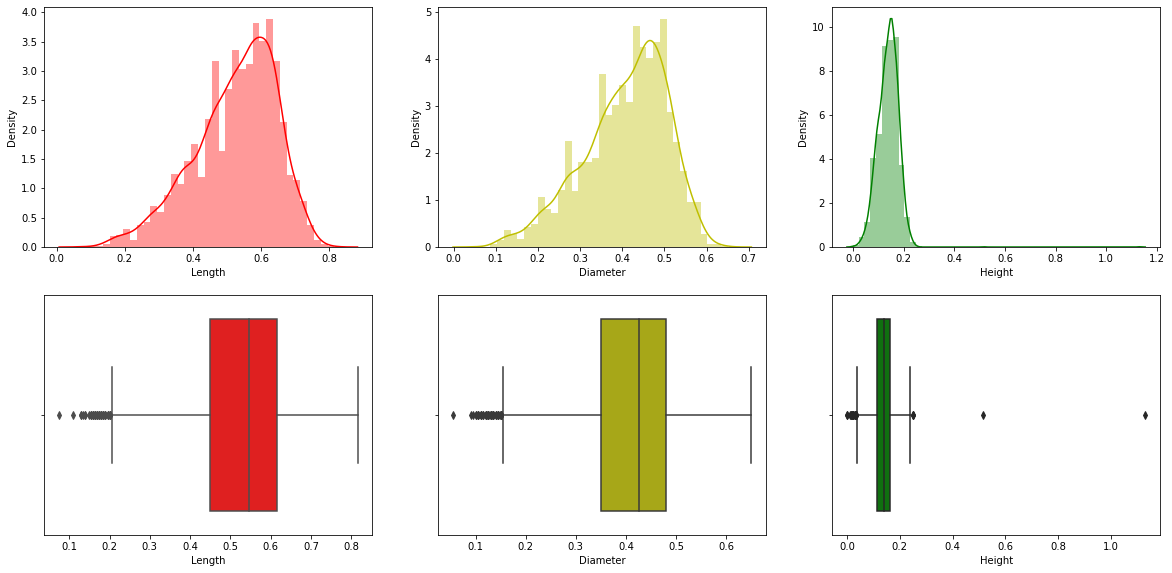

In [64]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data.Length,color='red')
plt.subplot(3,3,2)
sns.distplot(data.Diameter,color='y')
plt.subplot(3,3,3)
sns.distplot(data.Height,color='g')
plt.subplot(3,3,4)
sns.boxplot(data.Length,color='red')
plt.subplot(3,3,5)
sns.boxplot(data.Diameter,color='y')
plt.subplot(3,3,6)
sns.boxplot(data.Height,color='g')

<AxesSubplot:title={'center':'Distribution of Shell weight'}, xlabel='Shell weight'>

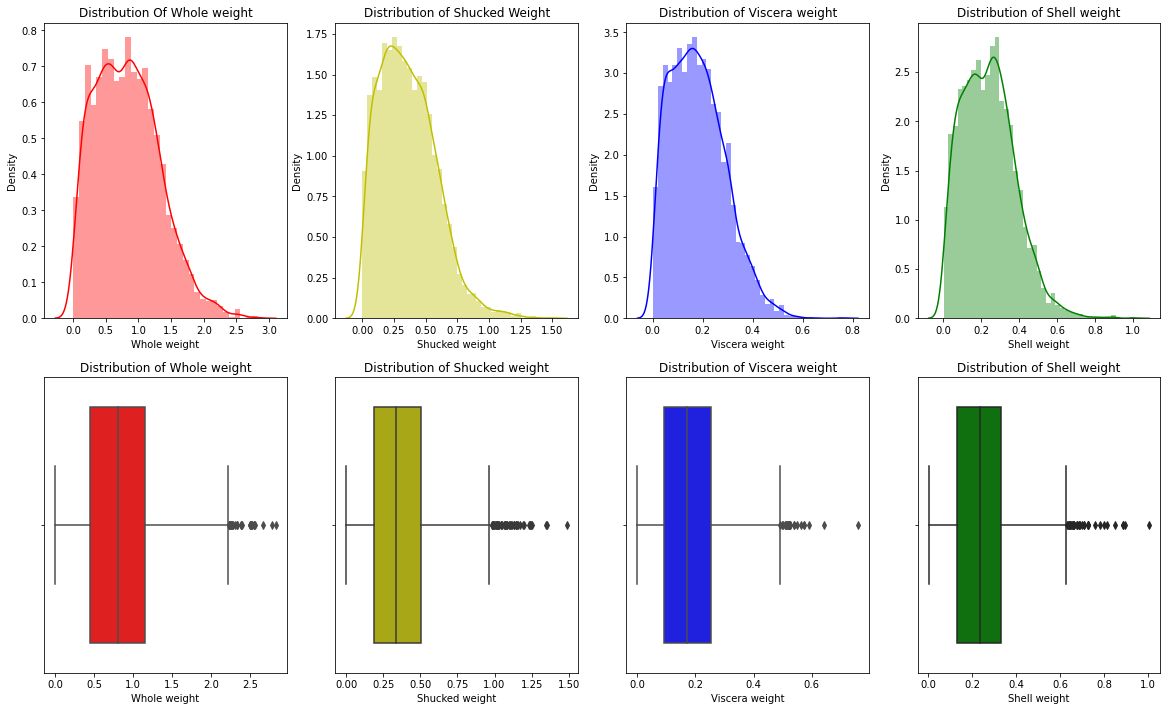

In [65]:
plt.figure(figsize=(20,25))
plt.subplot(4,4,1)
plt.title("Distribution Of Whole weight")
sns.distplot(data['Whole weight'],color='red')
plt.subplot(4,4,2)
plt.title("Distribution of Shucked Weight")
sns.distplot(data['Shucked weight'],color='y')
plt.subplot(4,4,3)
plt.title("Distribution of Viscera weight")
sns.distplot(data['Viscera weight'],color='b')
plt.subplot(4,4,4)
plt.title("Distribution of Shell weight")
sns.distplot(data['Shell weight'],color='g')
plt.subplot(4,4,5)
plt.title("Distribution of Whole weight")
sns.boxplot(data['Whole weight'],color='red')
plt.subplot(4,4,6)
plt.title("Distribution of Shucked weight")
sns.boxplot(data['Shucked weight'],color='y')
plt.subplot(4,4,7)
plt.title("Distribution of Viscera weight")
sns.boxplot(data['Viscera weight'],color='b')
plt.subplot(4,4,8)
plt.title("Distribution of Shell weight")
sns.boxplot(data['Shell weight'],color='g')

In [66]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [67]:
col=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
df=data[col]

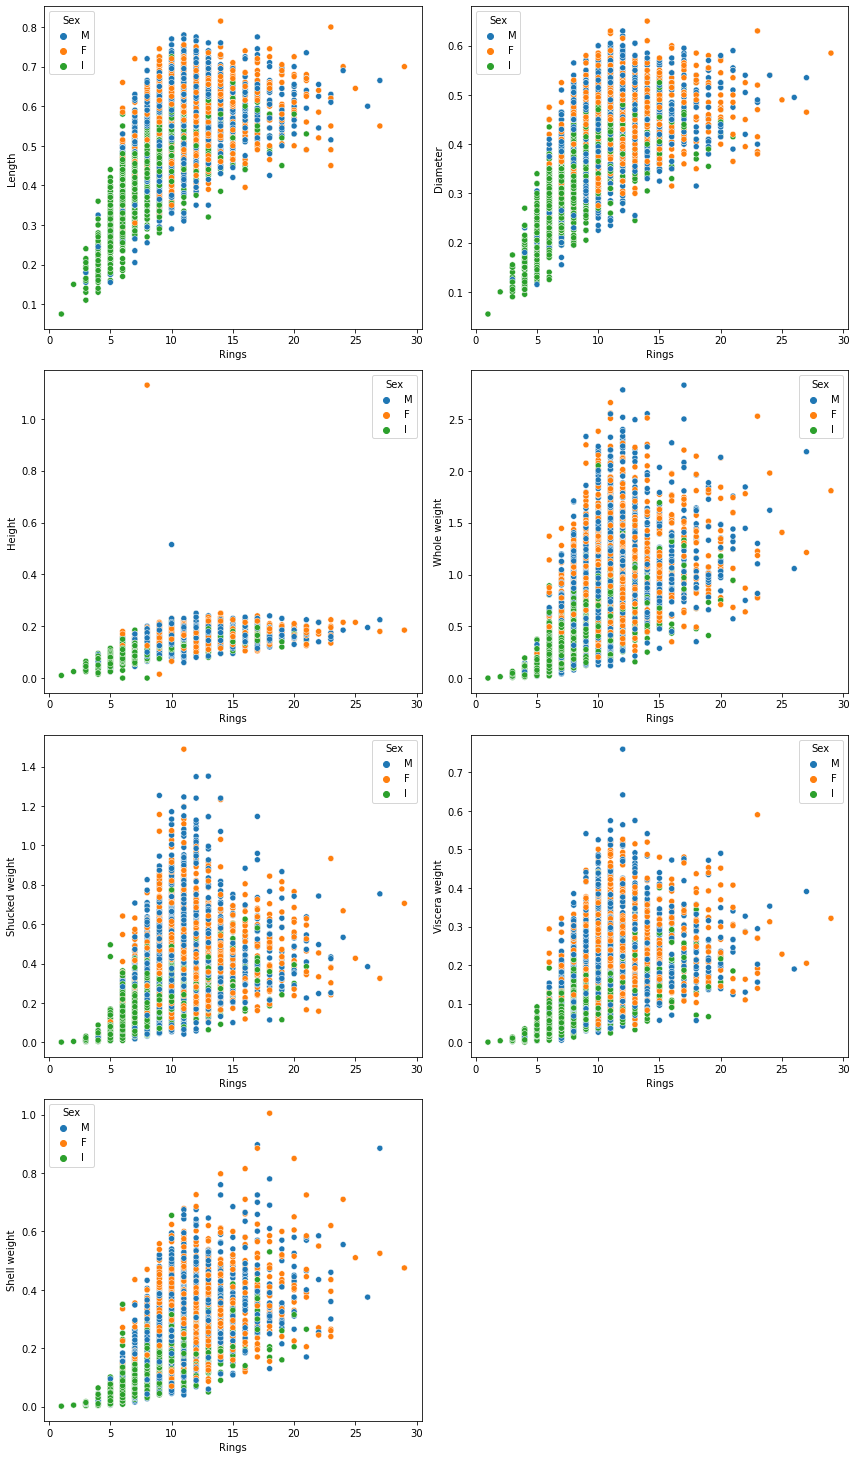

In [68]:
#Bivariate analysis

plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data.Rings,y=data[col[i]],hue=data.Sex)
  plt.tight_layout()

In [69]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

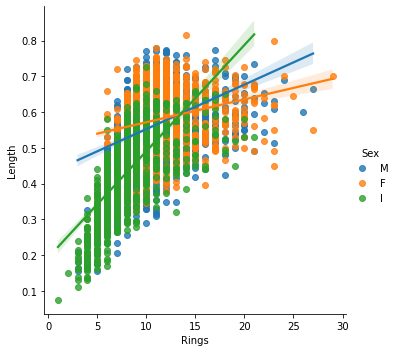

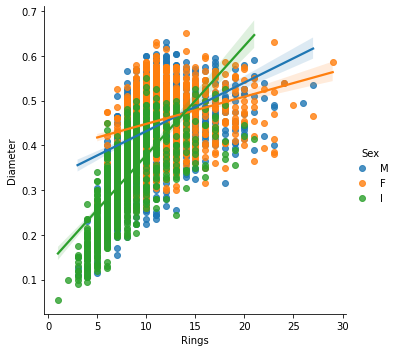

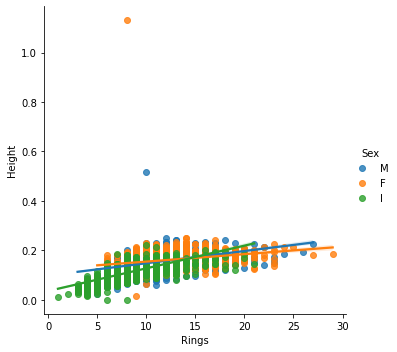

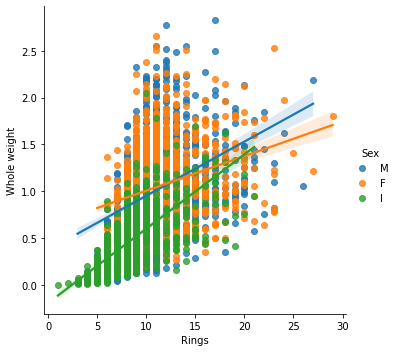

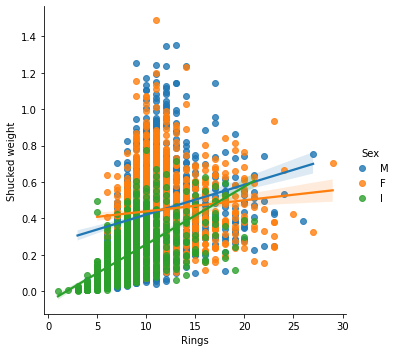

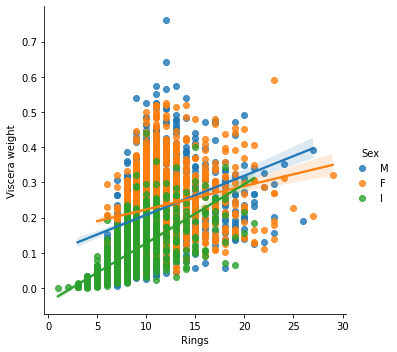

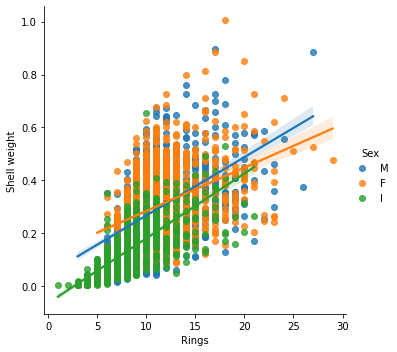

In [70]:
sns.lmplot(x='Rings',y='Length',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Diameter',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Height',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Whole weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shucked weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Viscera weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shell weight',data=data,hue='Sex')

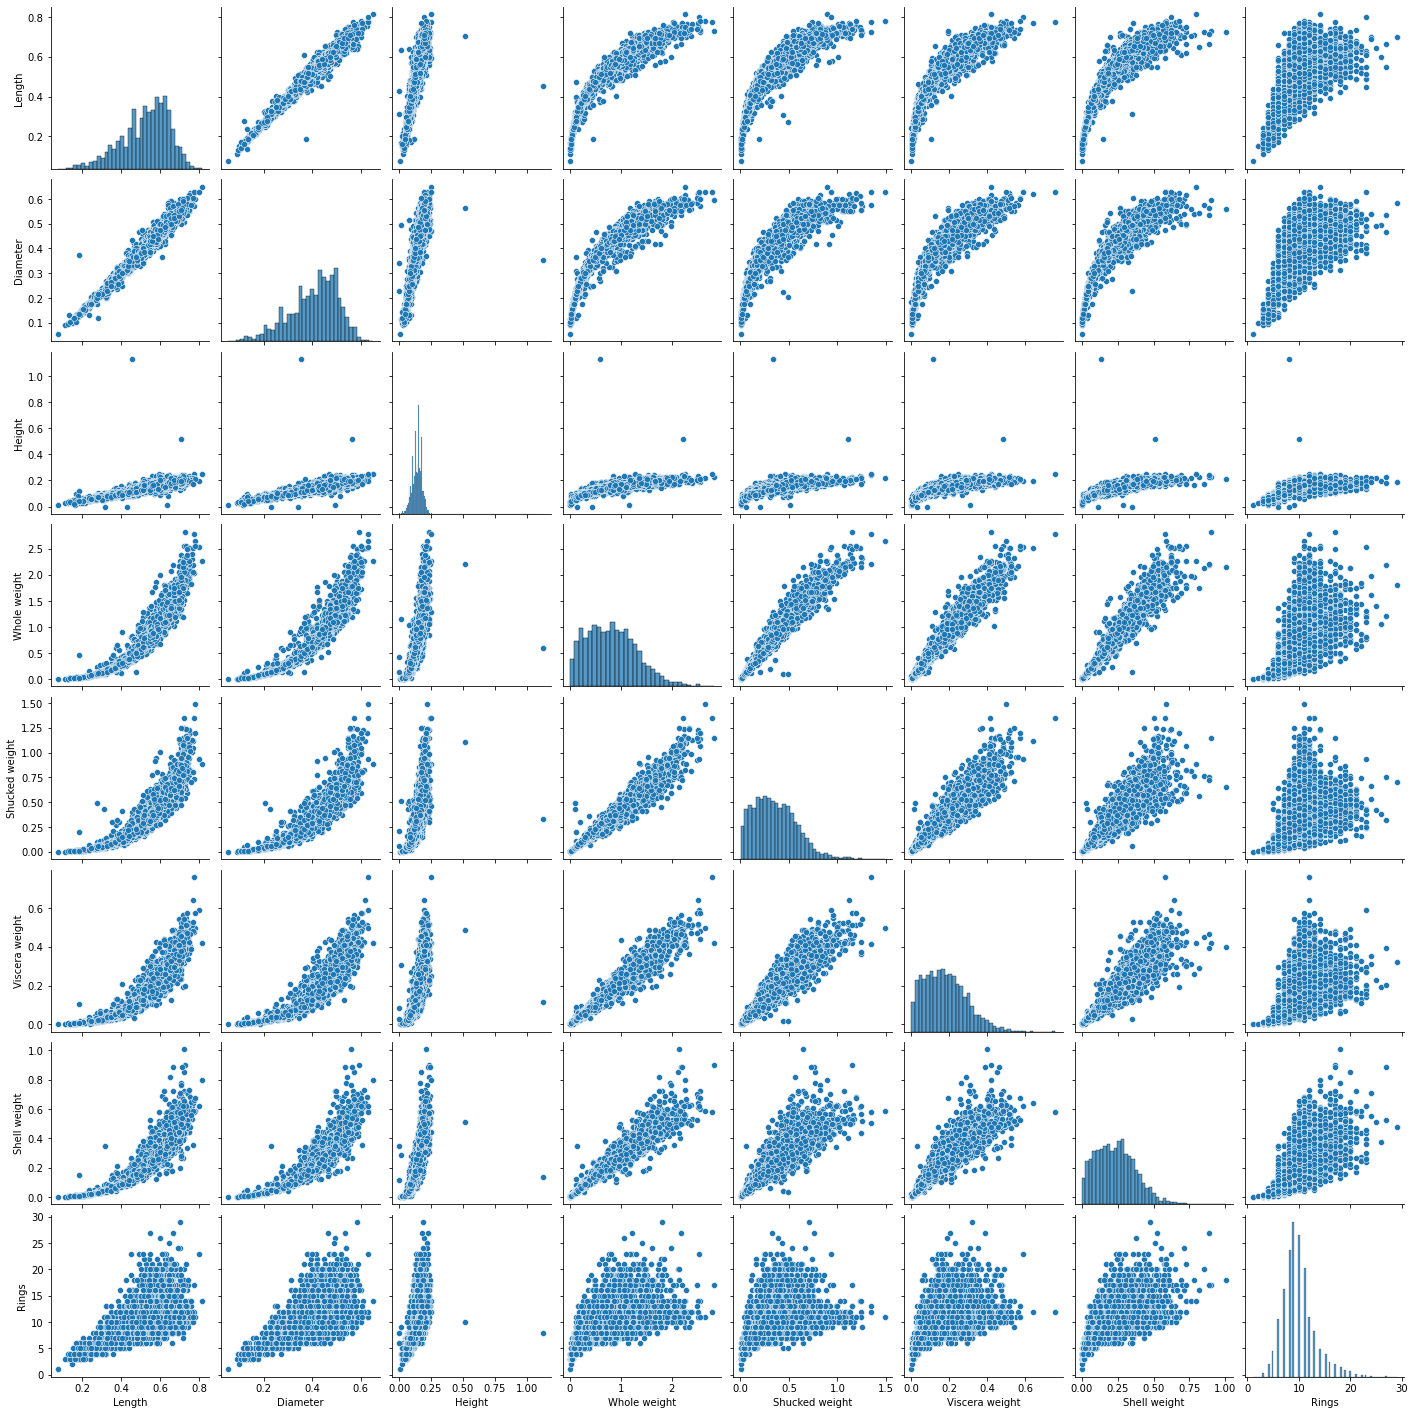

In [71]:
sns.pairplot(data)

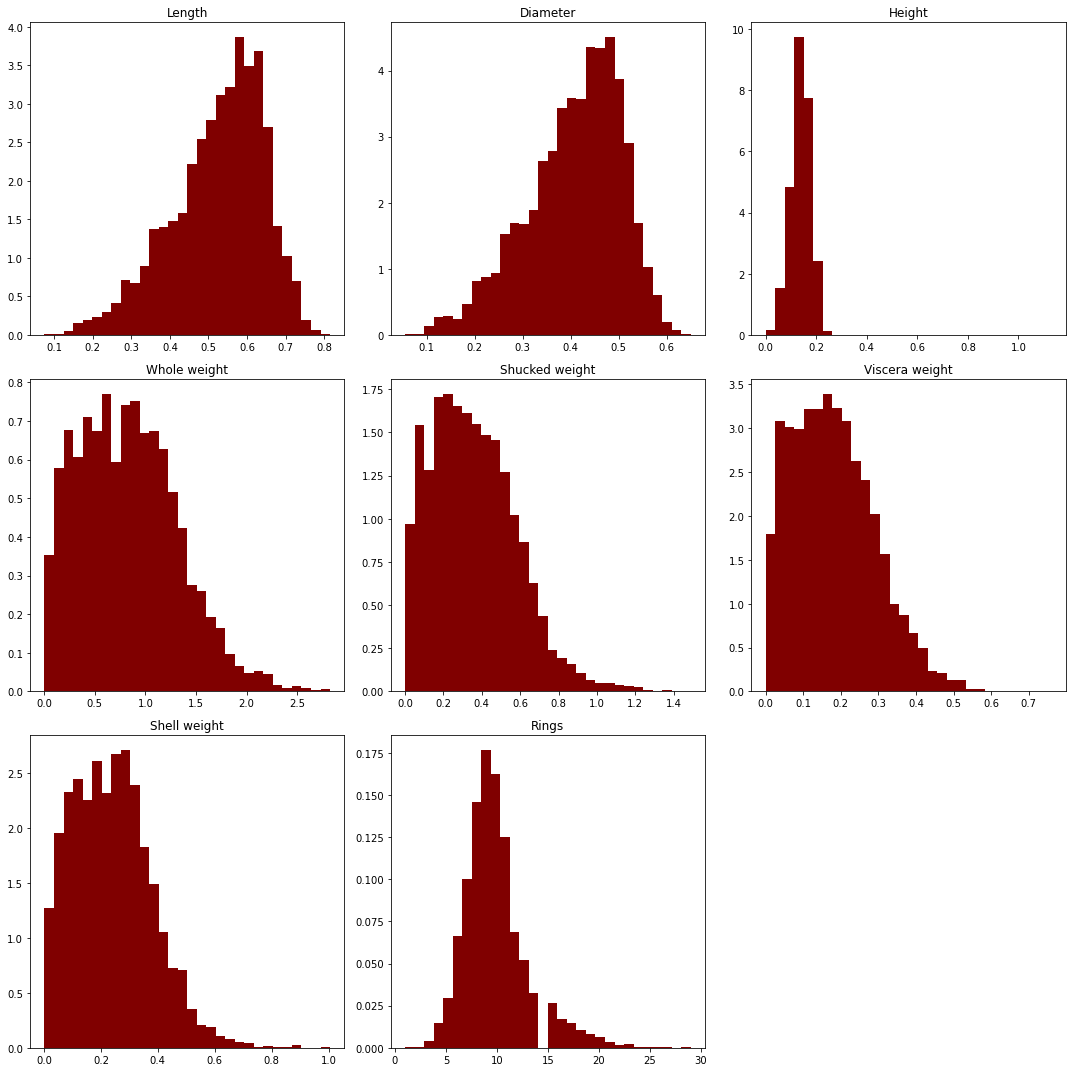

In [72]:
plt.rcParams['figure.figsize'] = (15,15)
data.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

In [73]:
#Exploring data variable

data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [74]:
def labels(x):
  if x<=10:
    return 'young'
  if x<=20:
    return 'middle_age'
  if x<=30:
    return 'old'
data['Rings']=data['Rings'].apply(labels)

In [75]:
# Encoding Categorical features into ordinal numerical value

oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=oe.fit_transform(df[column])
  return df




In [76]:
ordinal_column=['Sex','Rings']
data=ordinal_encoder(data,ordinal_column)


In [77]:

# pre-processing the datadef preprocessing(df):
df=df.copy()
df=ordinal_encoder(df['Sex'])
return df
df=preprocessing(data)

KeyError: 'Sex'

In [ ]:
df['Rings'].value_counts()

In [ ]:
df['Sex'].value_counts()

In [ ]:
X=df.drop("Rings",axis=1)
y=df['Rings']

In [ ]:
X.dtypes

In [ ]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

In [ ]:
#Removing the outliers

for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]] = percentile[0]
  X[col][X[col] >=percentile[1]] = percentile[1]

In [ ]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

In [ ]:
X_corr=X.corr()
X_corr

In [ ]:
#MULTIVARIATE ANALYSIS
# Visualizing Correlation heatmap


plt.figure(figsize=(15,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True,linewidths=0.5,linecolor="red", fmt= '.2f')

In [ ]:
X.skew()

In [ ]:
X

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
x=data.drop("Rings",axis=1)
X=pd.DataFrame(X,columns=x.columns)
X

In [ ]:
X.skew()

In [ ]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=X.columns)
y_new=pd.DataFrame(y_res,columns=['Rings'])

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Imbalanced Data")
sns.countplot(data['Rings'])
plt.subplot(2,2,2)
plt.title("Balanced Data")
sns.countplot(y_new['Rings'])

In [ ]:
#Handling skewness of data

X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [ ]:
X_new.skew()

In [ ]:
y_new

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [ ]:
models={"ExtraTreesClassifier":ExtraTreesClassifier(),"RandomForestClassifier":RandomForestClassifier(),"XGBClassifier":XGBClassifier(),"LGBMClassifier":LGBMClassifier(),"BaggingClassifier":BaggingClassifier(),"LogisticRegression":LogisticRegression()}

In [ ]:
X_new.shape,y_new.shape

In [ ]:
Model=[]
Score=[]
CVS=[]
train=[]
for name,model in models.items():
  print('***************************',name,'******************************')
  print('\n')
  Model.append(name)
  model.fit(X_train,y_train)
  print(model)
  print("\n")
  train_hat=model.predict(X_train)
  accs=accuracy_score(y_train,train_hat)
  train.append(accs)
  y_pred=model.predict(X_test)
  As_test=accuracy_score(y_test,y_pred)
  Score.append(As_test*100)
  cv=cross_val_score(model,X_new,y_new,cv=5,scoring='accuracy').mean()
  print("Cross_Val_Score==",cv)
  CVS.append(cv*100)
  print("\n")
  print("Test Score of is==",As_test)
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion Matrix:\n")
  print(cm)
  print("\n")
  report=classification_report(y_test,y_pred)
  print("Classification Report:\n")
  print(report)
  print("\n")
  print("ROC_AUC CURVE")
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['YOUNG','MIDDLE AGE','OLD'],micro=False,macro=False)
  print("\n")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,shuffle=True,scoring='accuracy',n_jobs=-1,figsize=(12,7),title_fontsize="large",text_fontsize="large",title=name)

In [ ]:
import joblib
joblib.dump(Etree,"Abalone_Model.obj")

In [ ]:
model=joblib.load('Abalone_Model.obj')

In [ ]:
y_preds=model.predict(X_test)
predicted=pd.DataFrame(y_pred,columns=['predicted'])
predicted